In [30]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib.pyplot import figure

In [2]:
Poverty=pd.read_csv('Resources/PovertyReport.csv')
Clean_df=pd.read_csv('Clean_Data_Output/Clean_Data_Final.csv')

In [3]:
Poverty=Poverty.drop([0])

In [4]:
Poverty=Poverty.reset_index()

In [5]:
del Poverty["index"]

In [6]:
Poverty_df=Poverty.rename(columns={"Column1":"State", "Column5": "Poverty Rate"})

In [7]:
Poverty_df

,State,Poverty Rate
0,Alabama,15.6
1,Alaska,10.2
2,Arizona,13.5
3,Arkansas,16
4,California,11.8
5,Colorado,9.4
6,Connecticut,9.9
7,Delaware,11.2
8,District of Columbia,14.1
9,Florida,12.7


In [8]:
Poverty_df=Clean_df.merge(Poverty_df, on="State", how="left")

In [15]:
Poverty_df["Poverty Rate"]=Poverty_df["Poverty Rate"].astype(float)

In [21]:
Poverty_df=Poverty_df.sort_values(by="Poverty Rate", ascending=True)

In [22]:
Poverty_df

,Unnamed: 0,State,Total Murders (2019),2019 Population,Murders Per Capita/Homicide Rate,Unemployment Rate,Poverty Rate
6,29,New Hampshire,33.0,1359711.0,0.00002,2.6,7.5
1,44,Utah,66.0,3205958.0,0.00002,2.3,8.8
20,23,Minnesota,114.0,5639632.0,0.00002,3.3,8.9
7,11,Hawaii,32.0,1415872.0,0.00002,2.6,9.0
27,30,New Jersey,262.0,8882190.0,0.00003,3.5,9.1
28,20,Maryland,551.0,6045680.0,0.00009,3.5,9.1
4,5,Colorado,209.0,5758736.0,0.00004,2.5,9.4
10,21,Massachusetts,146.0,6892503.0,0.00002,2.8,9.5
42,47,Washington,194.0,7614893.0,0.00003,4.3,9.8
30,6,Connecticut,104.0,3565287.0,0.00003,3.7,9.9


<IPython.core.display.Javascript object>


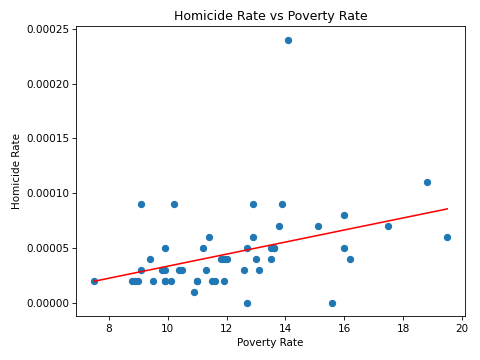

In [33]:
fig=plt.scatter(Poverty_df["Poverty Rate"], Poverty_df["Murders Per Capita/Homicide Rate"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(Poverty_df["Poverty Rate"], Poverty_df["Murders Per Capita/Homicide Rate"])
regress_values = Poverty_df["Poverty Rate"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Homicide Rate vs Poverty Rate',fontsize =12)
plt.xlabel('Poverty Rate',fontsize =10)
plt.ylabel('Homicide Rate',fontsize =10)
plt.plot(Poverty_df["Poverty Rate"],regress_values,"r-")
plt.savefig("Image Output/PovertyRatevsHomicideRate.png", bbox_inches='tight')

plt.tight_layout()

In [34]:
correlation = st.pearsonr(Poverty_df["Poverty Rate"],Poverty_df["Murders Per Capita/Homicide Rate"])

In [35]:
correlation

(0.3883515898286932, 0.004861268119108661)

In [37]:
print(f"The correlation between both factors is {round(correlation[0],1)} or moderately correlated")


The correlation between both factors is 0.4 or moderately correlated
